# Seting up

In [1]:
import cv2
#from google.colab.patches import cv2_imshow

In [2]:
!pip install clearml

  Obtaining dependency information for clearml from https://files.pythonhosted.org/packages/0a/f1/ec897973d516c6cee3ef89bce9c8e058cc1d37ce770742321cd17ade2d35/clearml-1.13.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.3 MB/s eta 0:00:00 0:00:01


In [3]:
from clearml import Task

Task.set_credentials(
    api_host='https://api.clear.ml',
    web_host='https://app.clear.ml',
    files_host='https://files.clear.ml',
    key='4B8SJG5203T41JBN1UWO',
    secret='Ky8AgDhIZgx6qJXT6Fp6mZQ1DHupQX0ZWscGV0AkNhkPlzLPXv'
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [5]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5173.5/8062.4 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
from ultralytics import RTDETR, YOLO

from IPython.display import display, Image

Экспорт из Roboflow

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pIebj5J25hk6HjWetiu8")
project = rf.workspace("ilya-stmnk").project("road2-enpmd")
dataset = project.version(5).download("yolov8")

/kaggle/working/datasets
  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/33/5d/0b0b6a9e5e62cb79dd86c335a6c7f25e8f204d2f724496af0cba08058306/roboflow-1.1.9-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 4.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
  Obtaining dependency information for opencv-python-headless==4.8.0.74 from https://files.pythonhosted.org/packages/76/02/f128517f3ade4bb5f71e2afd8461dba70e3f466ce745fa1fd1fade9ad1b7/opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.8 MB/s eta 0:00:00
  Obtaining dependency information for supervision from https://files.pythonhosted.org/packages/c0/59/6bc863f530c0ba5da4c565fd40f17b2b333c2ab28b783202937293ae494a/supervision-0.16.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


Extracting Dataset Version Zip to road2-5 in yolov8:: 100%|██████████| 11300/11300 [00:02<00:00, 4650.24it/s]


In [8]:
!cat /kaggle/input/data-yaml-new/data.yaml > /kaggle/working/datasets/road2-5/data.yaml
!cat /kaggle/working/datasets/road2-5/data.yaml

names:
- artificial_unevenness
- bicycle_lane
- bus
- children
- gas station
- give_way
- intersection_with_bicycle_path
- main_road
- no_entry
- no_stopping
- no_traffic
- pedestrian_crossing
- residential_area
- speed_limit_20
- speed_limit_40
- trucks
- uneven_road
nc: 17
roboflow:
  license: CC BY 4.0
  project: road2-enpmd
  url: https://universe.roboflow.com/ilya-stmnk/road2-enpmd/dataset/5
  version: 5
  workspace: ilya-stmnk
test: test/images
train: train/images
val: valid/images


# SGD Optimizer with 0.01 learning rate

In [ ]:
task = Task.init(project_name='Road_rt_detr', task_name='Road Signs SGD')

In [ ]:
model = RTDETR('rtdetr-l.pt')

In [ ]:
results = model.train(data=f"{dataset.location}/data.yaml", epochs=5, batch=16, imgsz=640, optimizer='SGD', lr0 = 1e-2, lrf = 1e-3, cos_lr=True)

In [ ]:
results.results_dict

In [ ]:
metrics = model.val()

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train2/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train2/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train2/val_batch2_pred.jpg', width=600)

In [ ]:
task.upload_artifact('rt-detr-sgd-best', artifact_object=f'{HOME}/datasets/runs/detect/train2/weights/best.pt')

In [ ]:
task.close()

# SGD Optimizer with 0.001 learning rate

In [ ]:
task = Task.init(project_name='Road_rt_detr', task_name='Road Signs SGD lr=1e-3')

In [ ]:
model = RTDETR('rtdetr-l.pt')

In [ ]:
results = model.train(data=f"{dataset.location}/data.yaml", epochs=5, batch=16, imgsz=640, optimizer='SGD', lr0 = 1e-3, lrf = 1e-4, cos_lr=True)

In [ ]:
results.results_dict

In [ ]:
metrics = model.val()

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/val_batch2_pred.jpg', width=600)

In [ ]:
task.upload_artifact('rt-detr-sgd-low-lr-best', artifact_object=f'{HOME}/datasets/runs/detect/train/weights/best.pt')

In [ ]:
task.close()

# AdamW Optimizer with 0.001 learning rate

In [ ]:
task = Task.init(project_name='Road_rt_detr', task_name='Road Signs AdamW')

In [ ]:
model = RTDETR('rtdetr-l.pt')

In [ ]:
results = model.train(data=f"{dataset.location}/data.yaml", epochs=5, batch=16, imgsz=640, optimizer='AdamW', lr0 = 1e-3, lrf = 1e-4, cos_lr=True)

In [ ]:
results.results_dict

In [ ]:
metrics = model.val()

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/val_batch2_pred.jpg', width=600)

In [ ]:
task.upload_artifact('rt-detr-adamw-best', artifact_object=f'{HOME}/datasets/runs/detect/train/weights/best.pt')

In [ ]:
task.close()

# SGD optimizer with 20 epochs

In [ ]:
task = Task.init(project_name='Road_rt_detr', task_name='Road Signs SGD 20 epochs')

In [ ]:
model = RTDETR('rtdetr-l.pt')

In [ ]:
results = model.train(data=f"{dataset.location}/data.yaml", epochs=20, batch=16, imgsz=640, optimizer='SGD', lr0 = 1e-2, lrf = 1e-3, cos_lr=True)

In [ ]:
results.results_dict

In [ ]:
metrics = model.val()

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/val_batch2_pred.jpg', width=600)

In [ ]:
task.upload_artifact('rt-detr-sgd-best', artifact_object=f'{HOME}/datasets/runs/detect/train/weights/best.pt')

In [ ]:
task.close()

# AdamW optimizer with 20 epochs

In [ ]:
task = Task.init(project_name='Road_rt_detr', task_name='Road Signs AdamW 20 epochs')

In [ ]:
model = RTDETR('rtdetr-l.pt')

In [ ]:
results = model.train(data=f"{dataset.location}/data.yaml", epochs=20, batch=16, imgsz=640)

In [ ]:
results.results_dict

In [ ]:
metrics = model.val()

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/val_batch2_pred.jpg', width=600)

In [ ]:
task.upload_artifact('rt-detr-sgd-best', artifact_object=f'{HOME}/datasets/runs/detect/train/weights/best.pt')

In [ ]:
task.close()

# AdamW 20 epochs new dataset

In [9]:
task = Task.init(project_name='Road_rt_detr', task_name='Road Signs AdamW 20 epochs new dataset')

ClearML Task: created new task id=93eda45640c34ea59fbf60c9ace68fa2
2023-11-23 12:36:05,522 - clearml.Repository Detection - WARNING - Jupyter Notebook auto-logging failed, could not access: /kaggle/working/datasets/__notebook_source__.ipynb
2023-11-23 12:36:05,528 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/79f2f3d136fb41a9802c4bcd3c866a53/experiments/93eda45640c34ea59fbf60c9ace68fa2/output/log


In [10]:
model = RTDETR('rtdetr-l.pt')

100%|██████████| 63.4M/63.4M [00:02<00:00, 27.9MB/s]


2023-11-23 12:36:26,667 - clearml.model - INFO - Selected model id: 62f2d9c2905a442aa5553193cdf6d941


Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-l.pt, data=/kaggle/working/datasets/road2-5/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

100%|██████████| 755k/755k [00:00<00:00, 4.64MB/s]
2023-11-23 12:36:40,753	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-11-23 12:36:41,191	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=17
WARNING ⚠️ no model scale passed. Assuming scale='l'.

                   from  n    params  module                                       arguments                     
  0                  -1  1     25248  ultralytics.nn.modules.block.HGStem          [3, 32, 48]                   
  1                  -1  6    155072  ultralytics.nn.modules.block.HGBlock         [48, 48, 128, 3, 6]           
  2                  -1  1      1408  ultralytics.nn.modules.conv.DWConv           [128, 128, 3, 2, 1, False]    
  3                  -1  6    839296  ultralytics.nn.modules.block.HGBlock         [128, 96, 512, 3, 6]          
  4                  -1  1      5632  ultralytics.nn.modules.conv.DWConv           [512, 512, 3, 2, 1, False]    
  5                  -1  6   1695360  ultralytics.nn.modules.block.HGBlock         [512, 192, 1024, 5, 6, True, False]
  6                  -1  6   2055808  ultralytics.nn.modules.block.HGBlock         [1024, 192, 1024, 5,

100%|██████████| 6.23M/6.23M [00:00<00:00, 21.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/road2-5/train/labels... 5265 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5265/5265 [00:03<00:00, 1339.29it/s]


train: New cache created: /kaggle/working/datasets/road2-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/road2-5/valid/labels... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<00:00, 1101.86it/s]

val: New cache created: /kaggle/working/datasets/road2-5/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000476, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)


/opt/conda/lib/python3.10/site-packages/ultralytics/nn/modules/transformer.py:92: TracerWarning:

Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!

/opt/conda/lib/python3.10/site-packages/ultralytics/nn/modules/transformer.py:93: TracerWarning:

Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!

/opt/conda/lib/python3.10/site-packages/ultralytics/nn/modules/transformer.py:95: TracerWarning:

Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that th

WARNING ⚠️ TensorBoard graph visualization failure 'NoneType' object is not subscriptable
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       1/20      14.3G     0.5322      8.701     0.4974          2        640: 100%|██████████| 330/330 [07:13<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

                   all        250        331      0.831      0.728      0.743      0.406



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       2/20      14.7G     0.3632     0.7539       0.34          3        640: 100%|██████████| 330/330 [07:05<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]

                   all        250        331       0.91      0.904      0.923       0.47



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       3/20      14.7G     0.3331     0.6673     0.3104          3        640: 100%|██████████| 330/330 [07:03<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        250        331      0.927      0.939      0.965      0.626



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       4/20      14.2G     0.3098     0.6211     0.2857          2        640: 100%|██████████| 330/330 [07:01<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        250        331      0.921      0.943      0.952      0.628



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       5/20      14.2G     0.2941     0.5881      0.274          2        640: 100%|██████████| 330/330 [07:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        250        331      0.883      0.949      0.952      0.807



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       6/20      14.2G     0.2731     0.5661     0.2535          2        640: 100%|██████████| 330/330 [07:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        250        331      0.947      0.967      0.981      0.739



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       7/20      14.1G     0.2644     0.5503     0.2447          4        640: 100%|██████████| 330/330 [07:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        250        331      0.962      0.958      0.979      0.766



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       8/20      14.6G      0.255     0.5289     0.2355          4        640: 100%|██████████| 330/330 [07:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]

                   all        250        331      0.945      0.972      0.984      0.754



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       9/20      14.6G      0.245     0.5064     0.2279          4        640: 100%|██████████| 330/330 [07:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all        250        331      0.977      0.967       0.98       0.77



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      10/20      14.2G     0.2377     0.4831     0.2182          5        640: 100%|██████████| 330/330 [07:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        250        331      0.967       0.98      0.975      0.628


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      11/20      14.6G     0.1965     0.3019     0.2405          1        640: 100%|██████████| 330/330 [07:03<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all        250        331      0.971      0.966      0.986      0.669



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      12/20      14.7G     0.1807     0.2832     0.2185          2        640: 100%|██████████| 330/330 [07:01<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        250        331      0.971       0.97      0.984      0.624



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      13/20      14.2G     0.1747     0.2726     0.2143          1        640: 100%|██████████| 330/330 [07:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        250        331      0.954      0.957       0.97      0.741



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      14/20      14.7G     0.1676     0.2629     0.2036          1        640: 100%|██████████| 330/330 [07:01<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        250        331      0.977      0.976      0.987      0.806



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      15/20      14.6G     0.1551     0.2518     0.1872          1        640: 100%|██████████| 330/330 [07:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        250        331      0.962      0.989      0.991       0.83



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      16/20      14.3G     0.1465     0.2405      0.175          1        640: 100%|██████████| 330/330 [07:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        250        331      0.971      0.969      0.986      0.837



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      17/20      14.2G     0.1389     0.2302     0.1672          2        640: 100%|██████████| 330/330 [07:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all        250        331      0.961      0.969      0.975      0.816



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      18/20      14.7G     0.1324     0.2355     0.1592          1        640: 100%|██████████| 330/330 [07:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all        250        331      0.957      0.977      0.982      0.819



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      19/20      14.7G     0.1284      0.217      0.153          1        640: 100%|██████████| 330/330 [07:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        250        331      0.966      0.977      0.979      0.829



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      20/20      14.2G     0.1185     0.2052     0.1406          1        640: 100%|██████████| 330/330 [07:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all        250        331      0.966      0.975      0.981      0.801



20 epochs completed in 2.403 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 66.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 66.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
rt-detr-l summary: 498 layers, 32018675 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]


                   all        250        331      0.971      0.968      0.985      0.836
 artificial_unevenness        250         20      0.968       0.95      0.946      0.845
          bicycle_lane        250         18      0.947      0.984      0.992      0.784
                   bus        250         19       0.98      0.947      0.993      0.907
              children        250         21      0.997      0.952      0.964       0.81
           gas station        250         13      0.995          1      0.995      0.903
              give_way        250         29          1      0.869      0.994      0.772
intersection_with_bicycle_path        250         18      0.996          1      0.995      0.828
             main_road        250         16          1       0.95      0.995      0.803
              no_entry        250         28      0.997      0.964      0.966      0.828
           no_stopping        250         18      0.941          1      0.981      0.807
            n

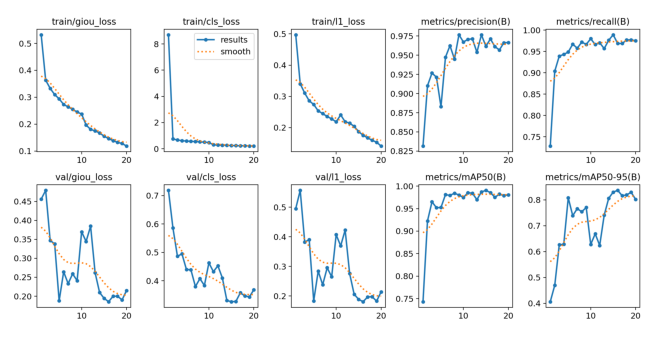

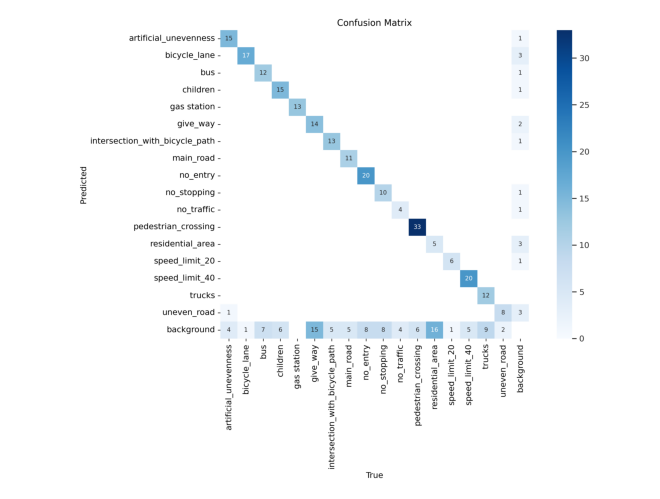

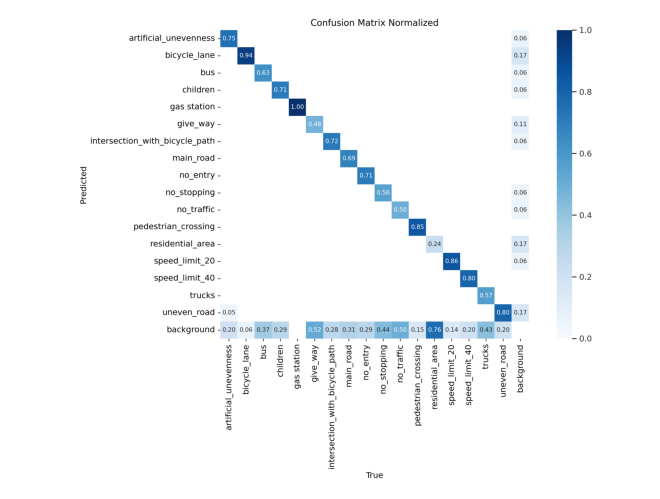

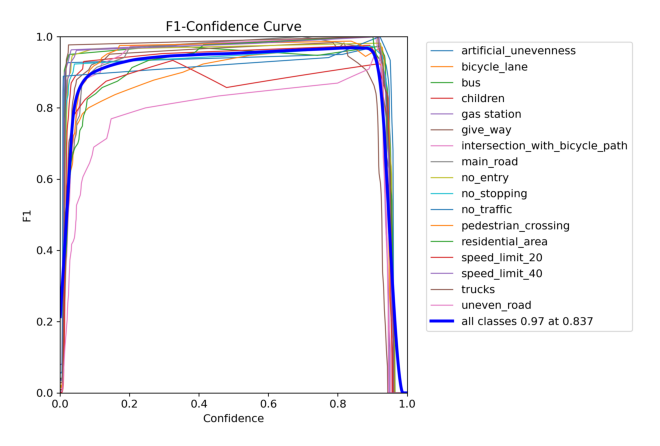

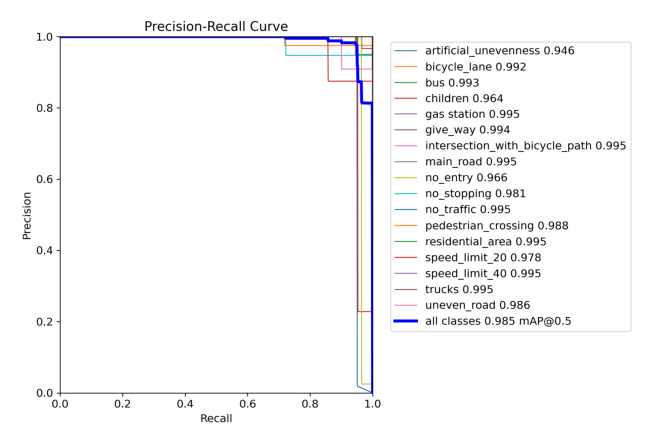

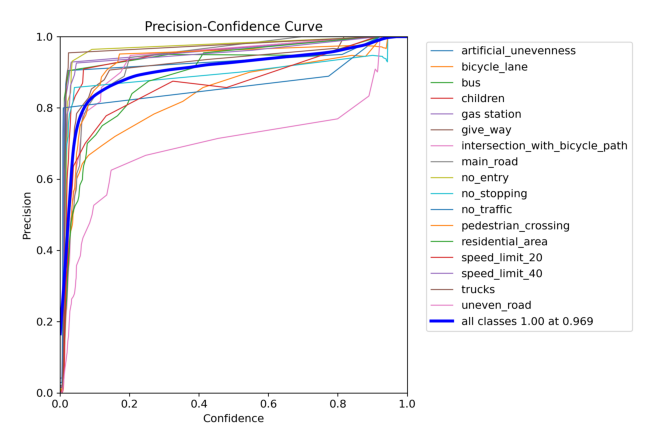

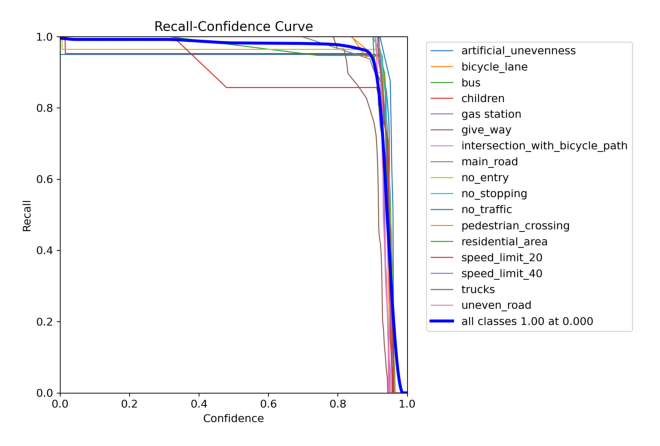

In [11]:
results = model.train(data=f"{dataset.location}/data.yaml", epochs=20, batch=16, imgsz=640)

In [12]:
results.results_dict

{'metrics/precision(B)': 0.9714065838160733,
 'metrics/recall(B)': 0.968461708296602,
 'metrics/mAP50(B)': 0.9853841157055967,
 'metrics/mAP50-95(B)': 0.8363732342496272,
 'fitness': 0.8512743223952242}

In [13]:
metrics = model.val()

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
rt-detr-l summary: 498 layers, 32018675 parameters, 0 gradients


val: Scanning /kaggle/working/datasets/road2-5/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]


2023-11-23 15:02:01,541 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/Road_rt_detr/Road%20Signs%20AdamW%2020%20epochs%20new%20dataset.93eda45640c34ea59fbf60c9ace68fa2/models/best.pt


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.05it/s]


                   all        250        331      0.971      0.969      0.986      0.836
 artificial_unevenness        250         20      0.968       0.95      0.946      0.853
          bicycle_lane        250         18      0.947      0.986      0.992      0.784
                   bus        250         19       0.98      0.947      0.993      0.902
              children        250         21      0.997      0.952      0.967      0.805
           gas station        250         13      0.995          1      0.995      0.903
              give_way        250         29          1      0.871      0.994      0.768
intersection_with_bicycle_path        250         18      0.996          1      0.995      0.828
             main_road        250         16          1       0.95      0.995      0.803
              no_entry        250         28      0.997      0.964      0.966      0.832
           no_stopping        250         18      0.941          1      0.981      0.808
            n

/kaggle/working


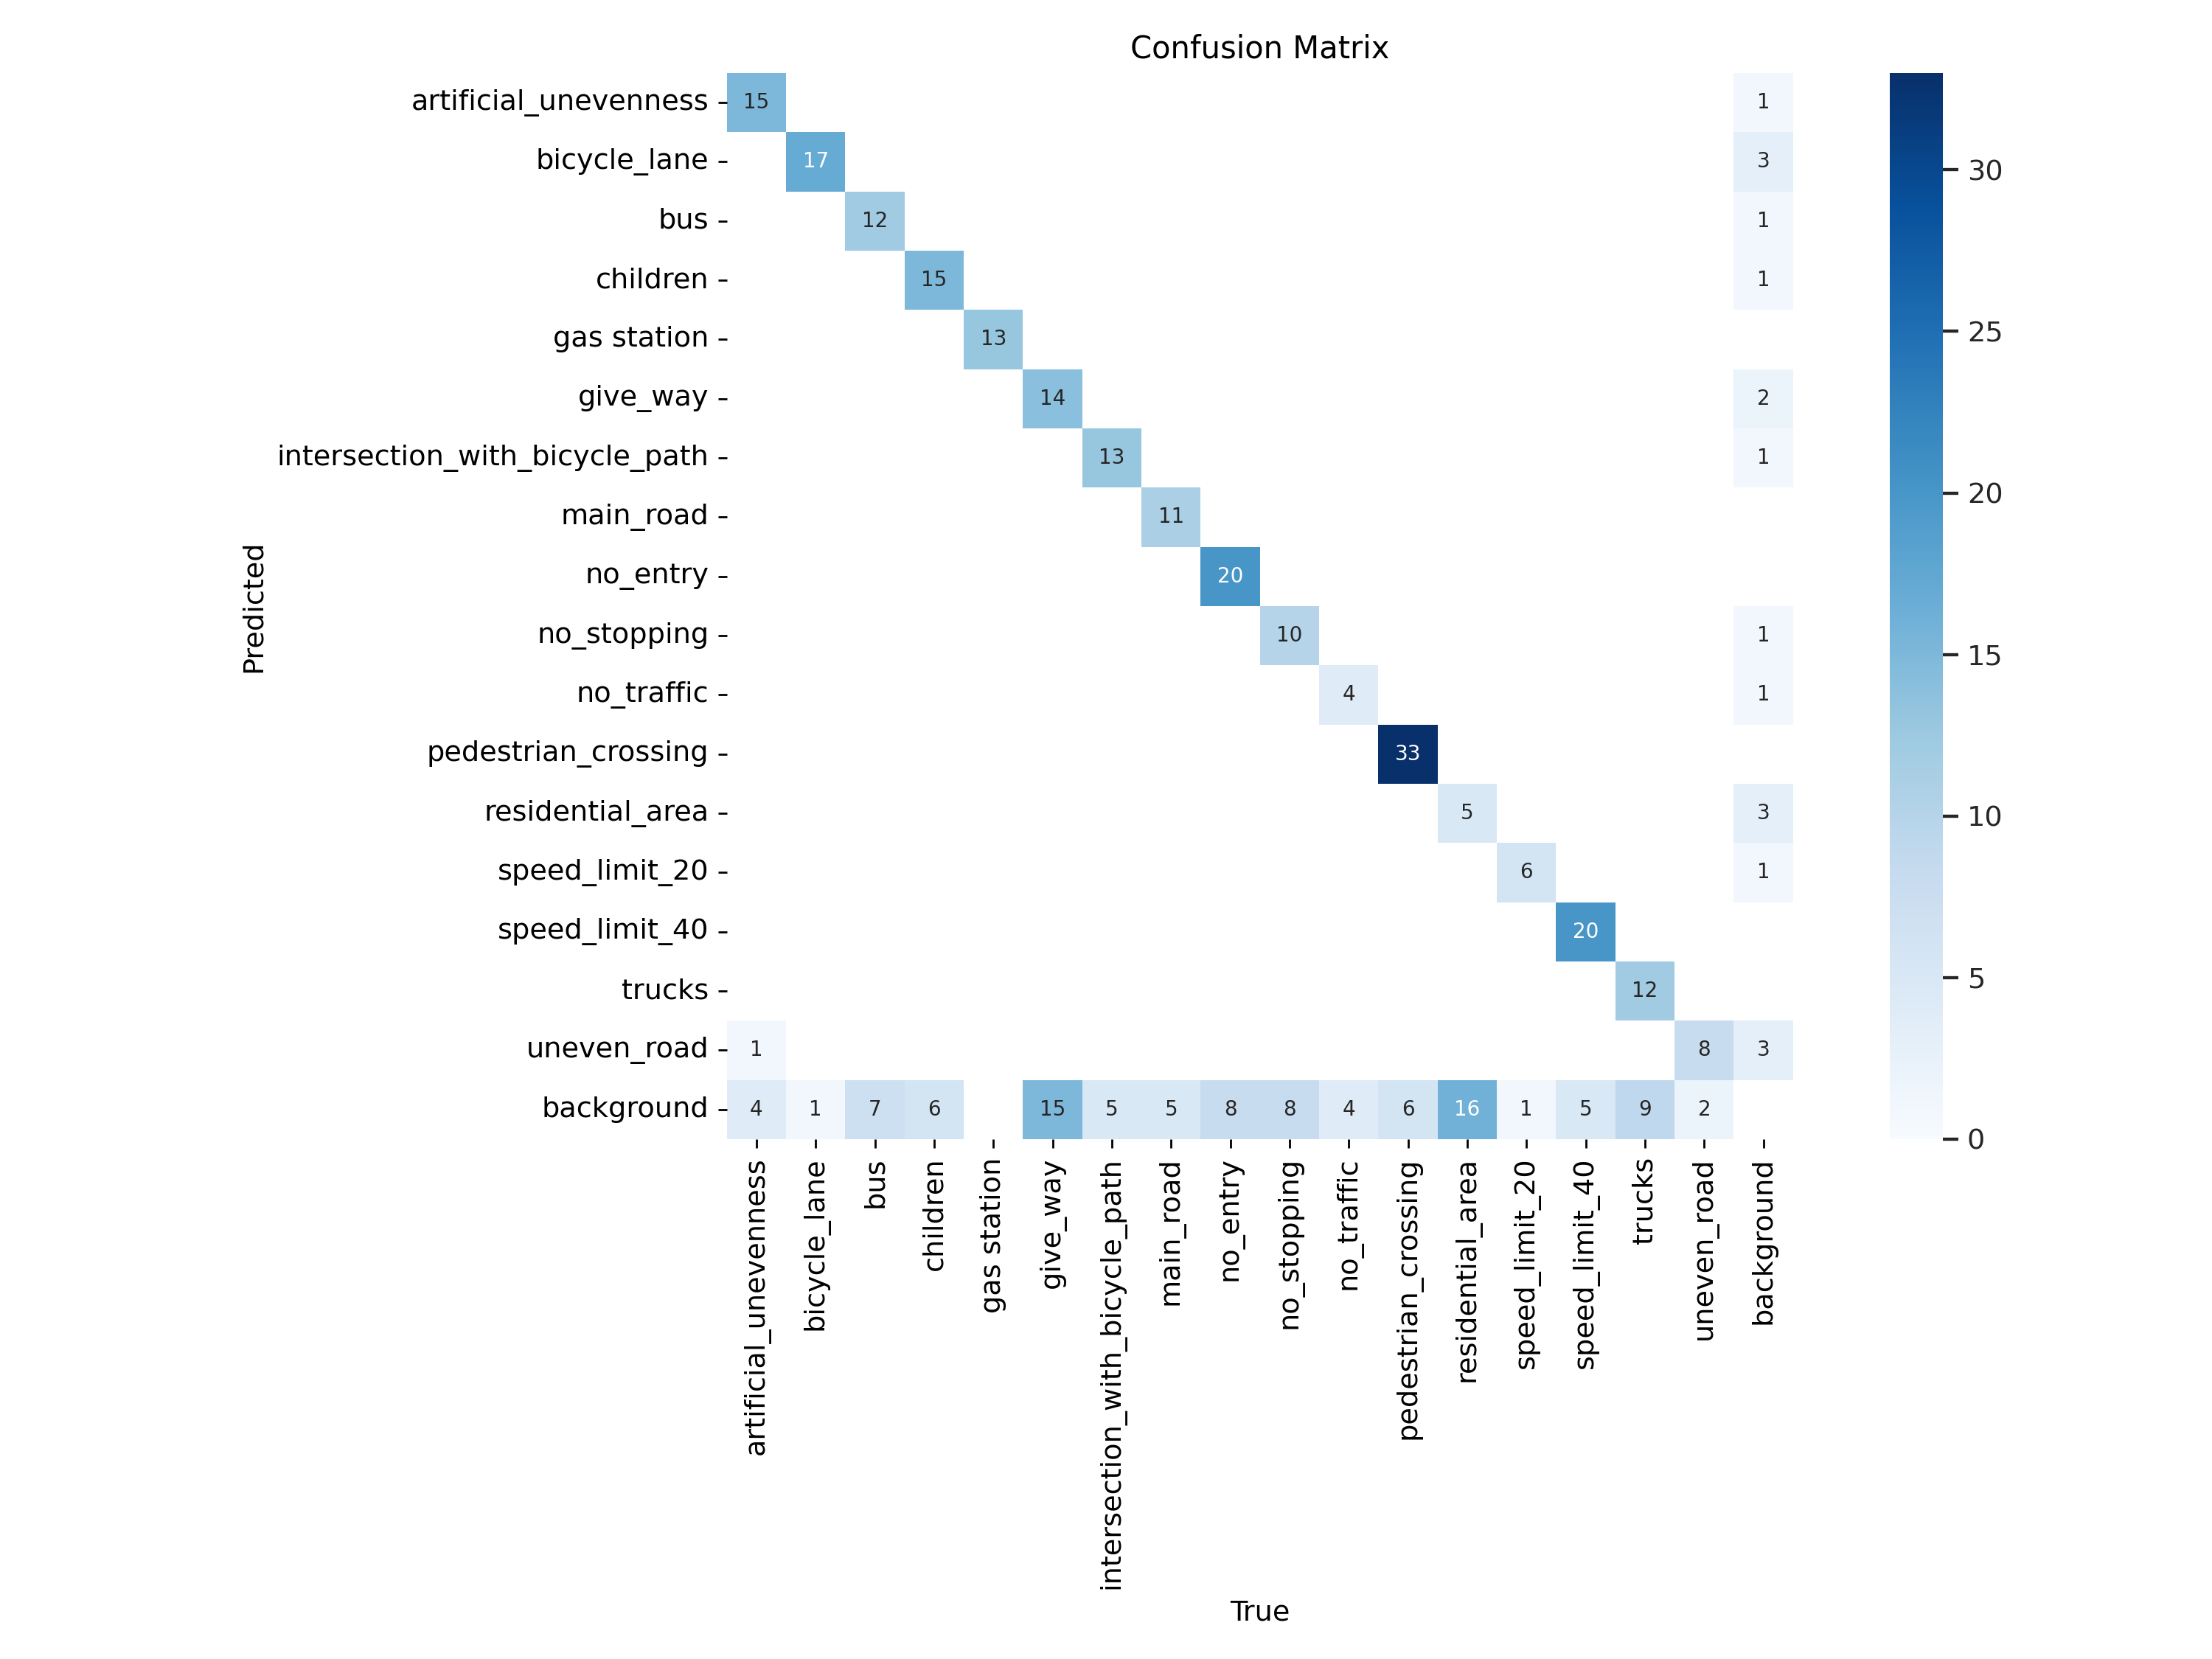

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


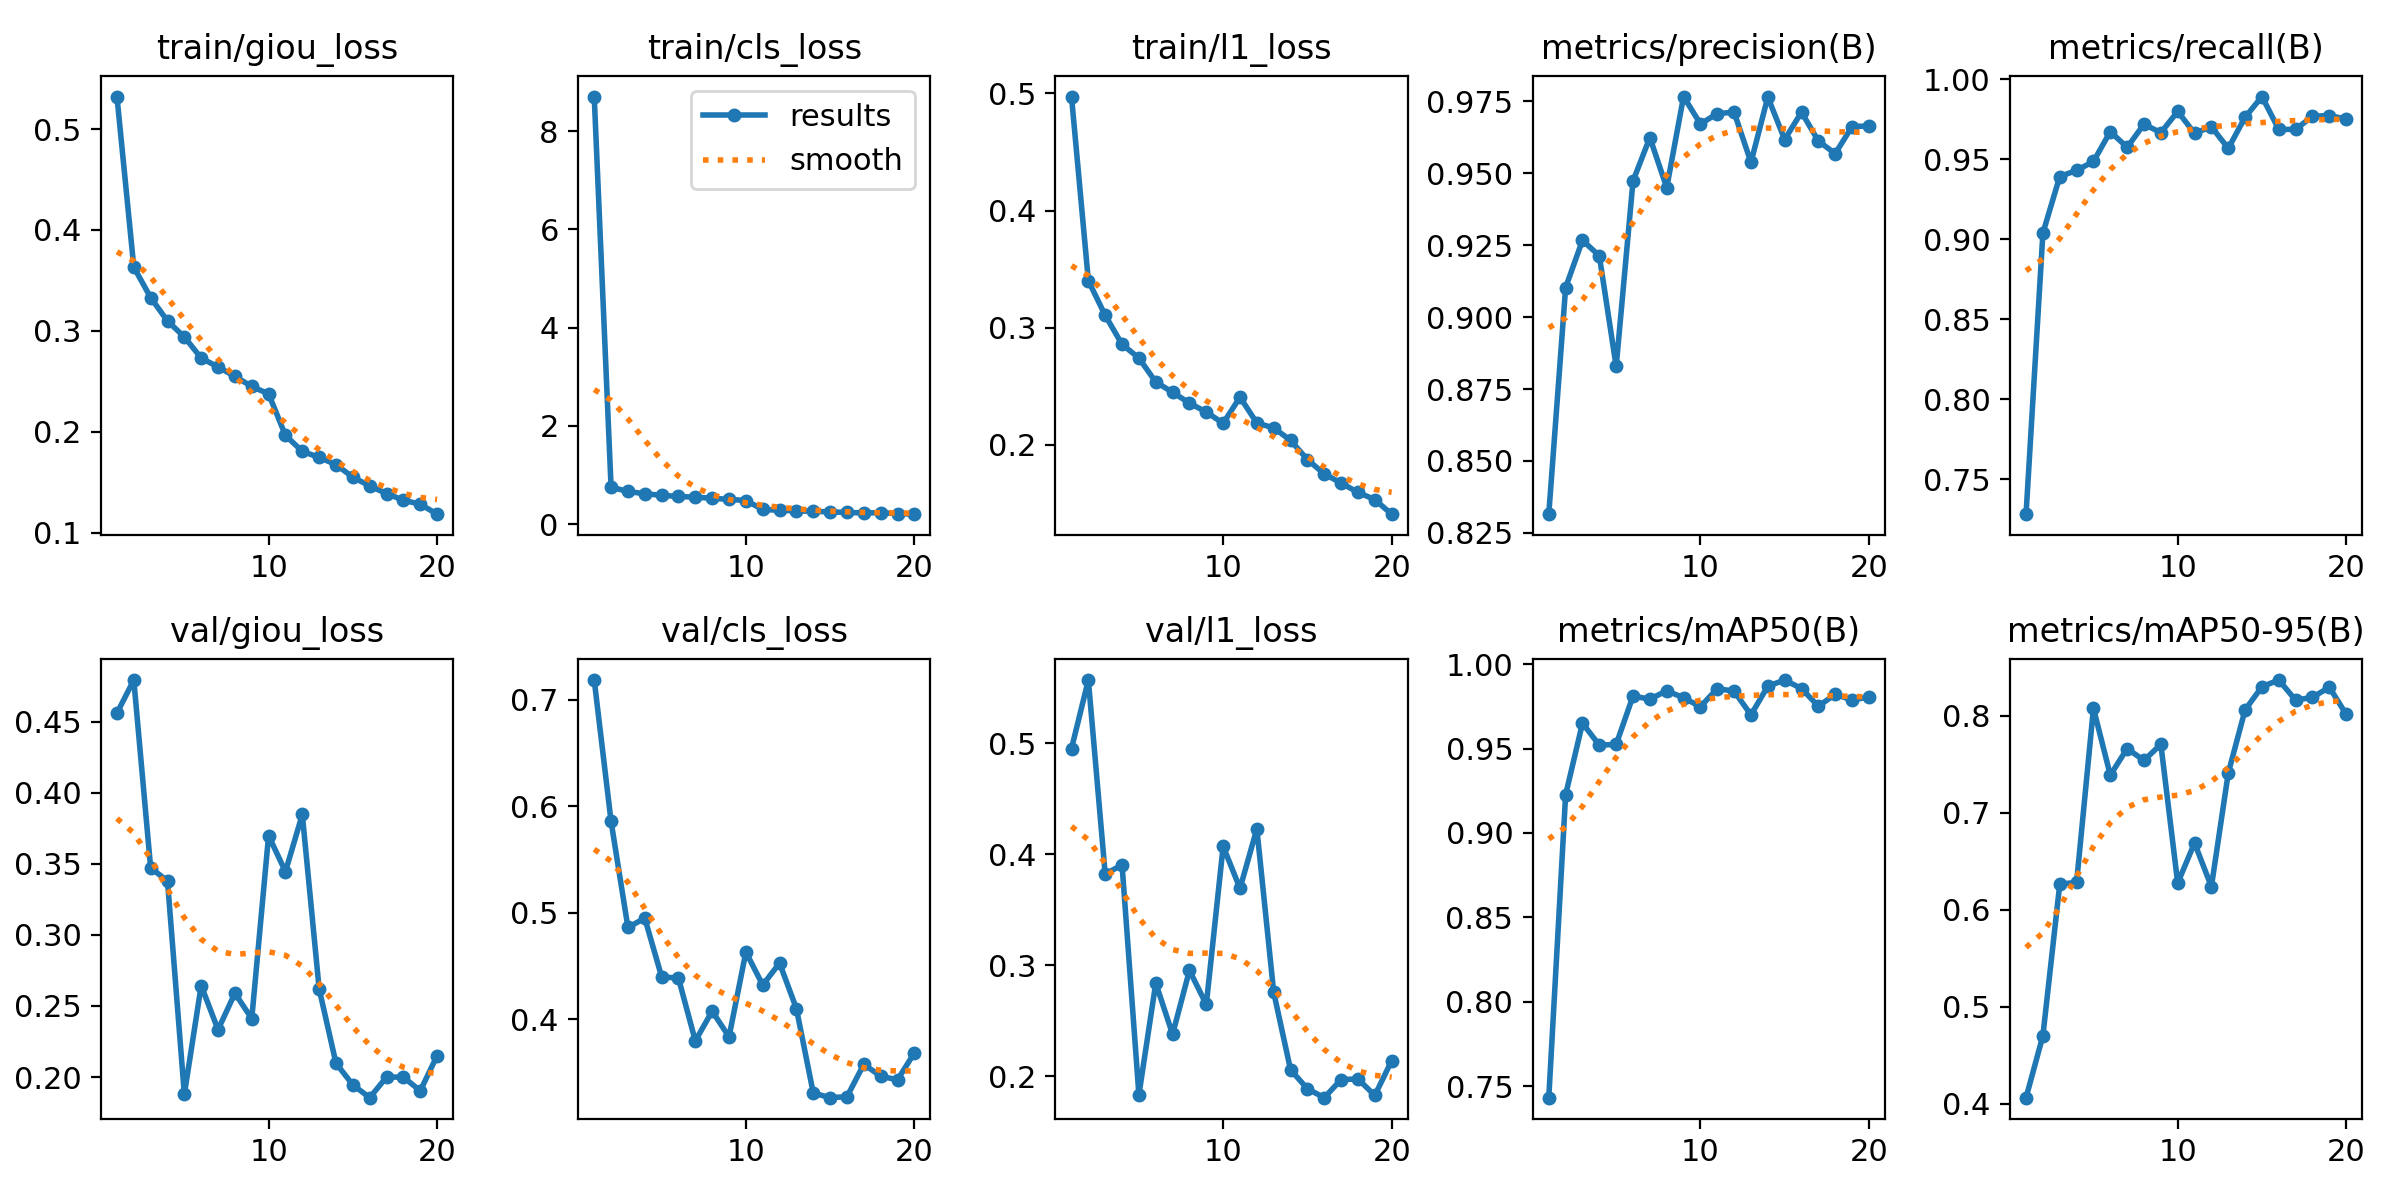

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/results.png', width=600)

/kaggle/working


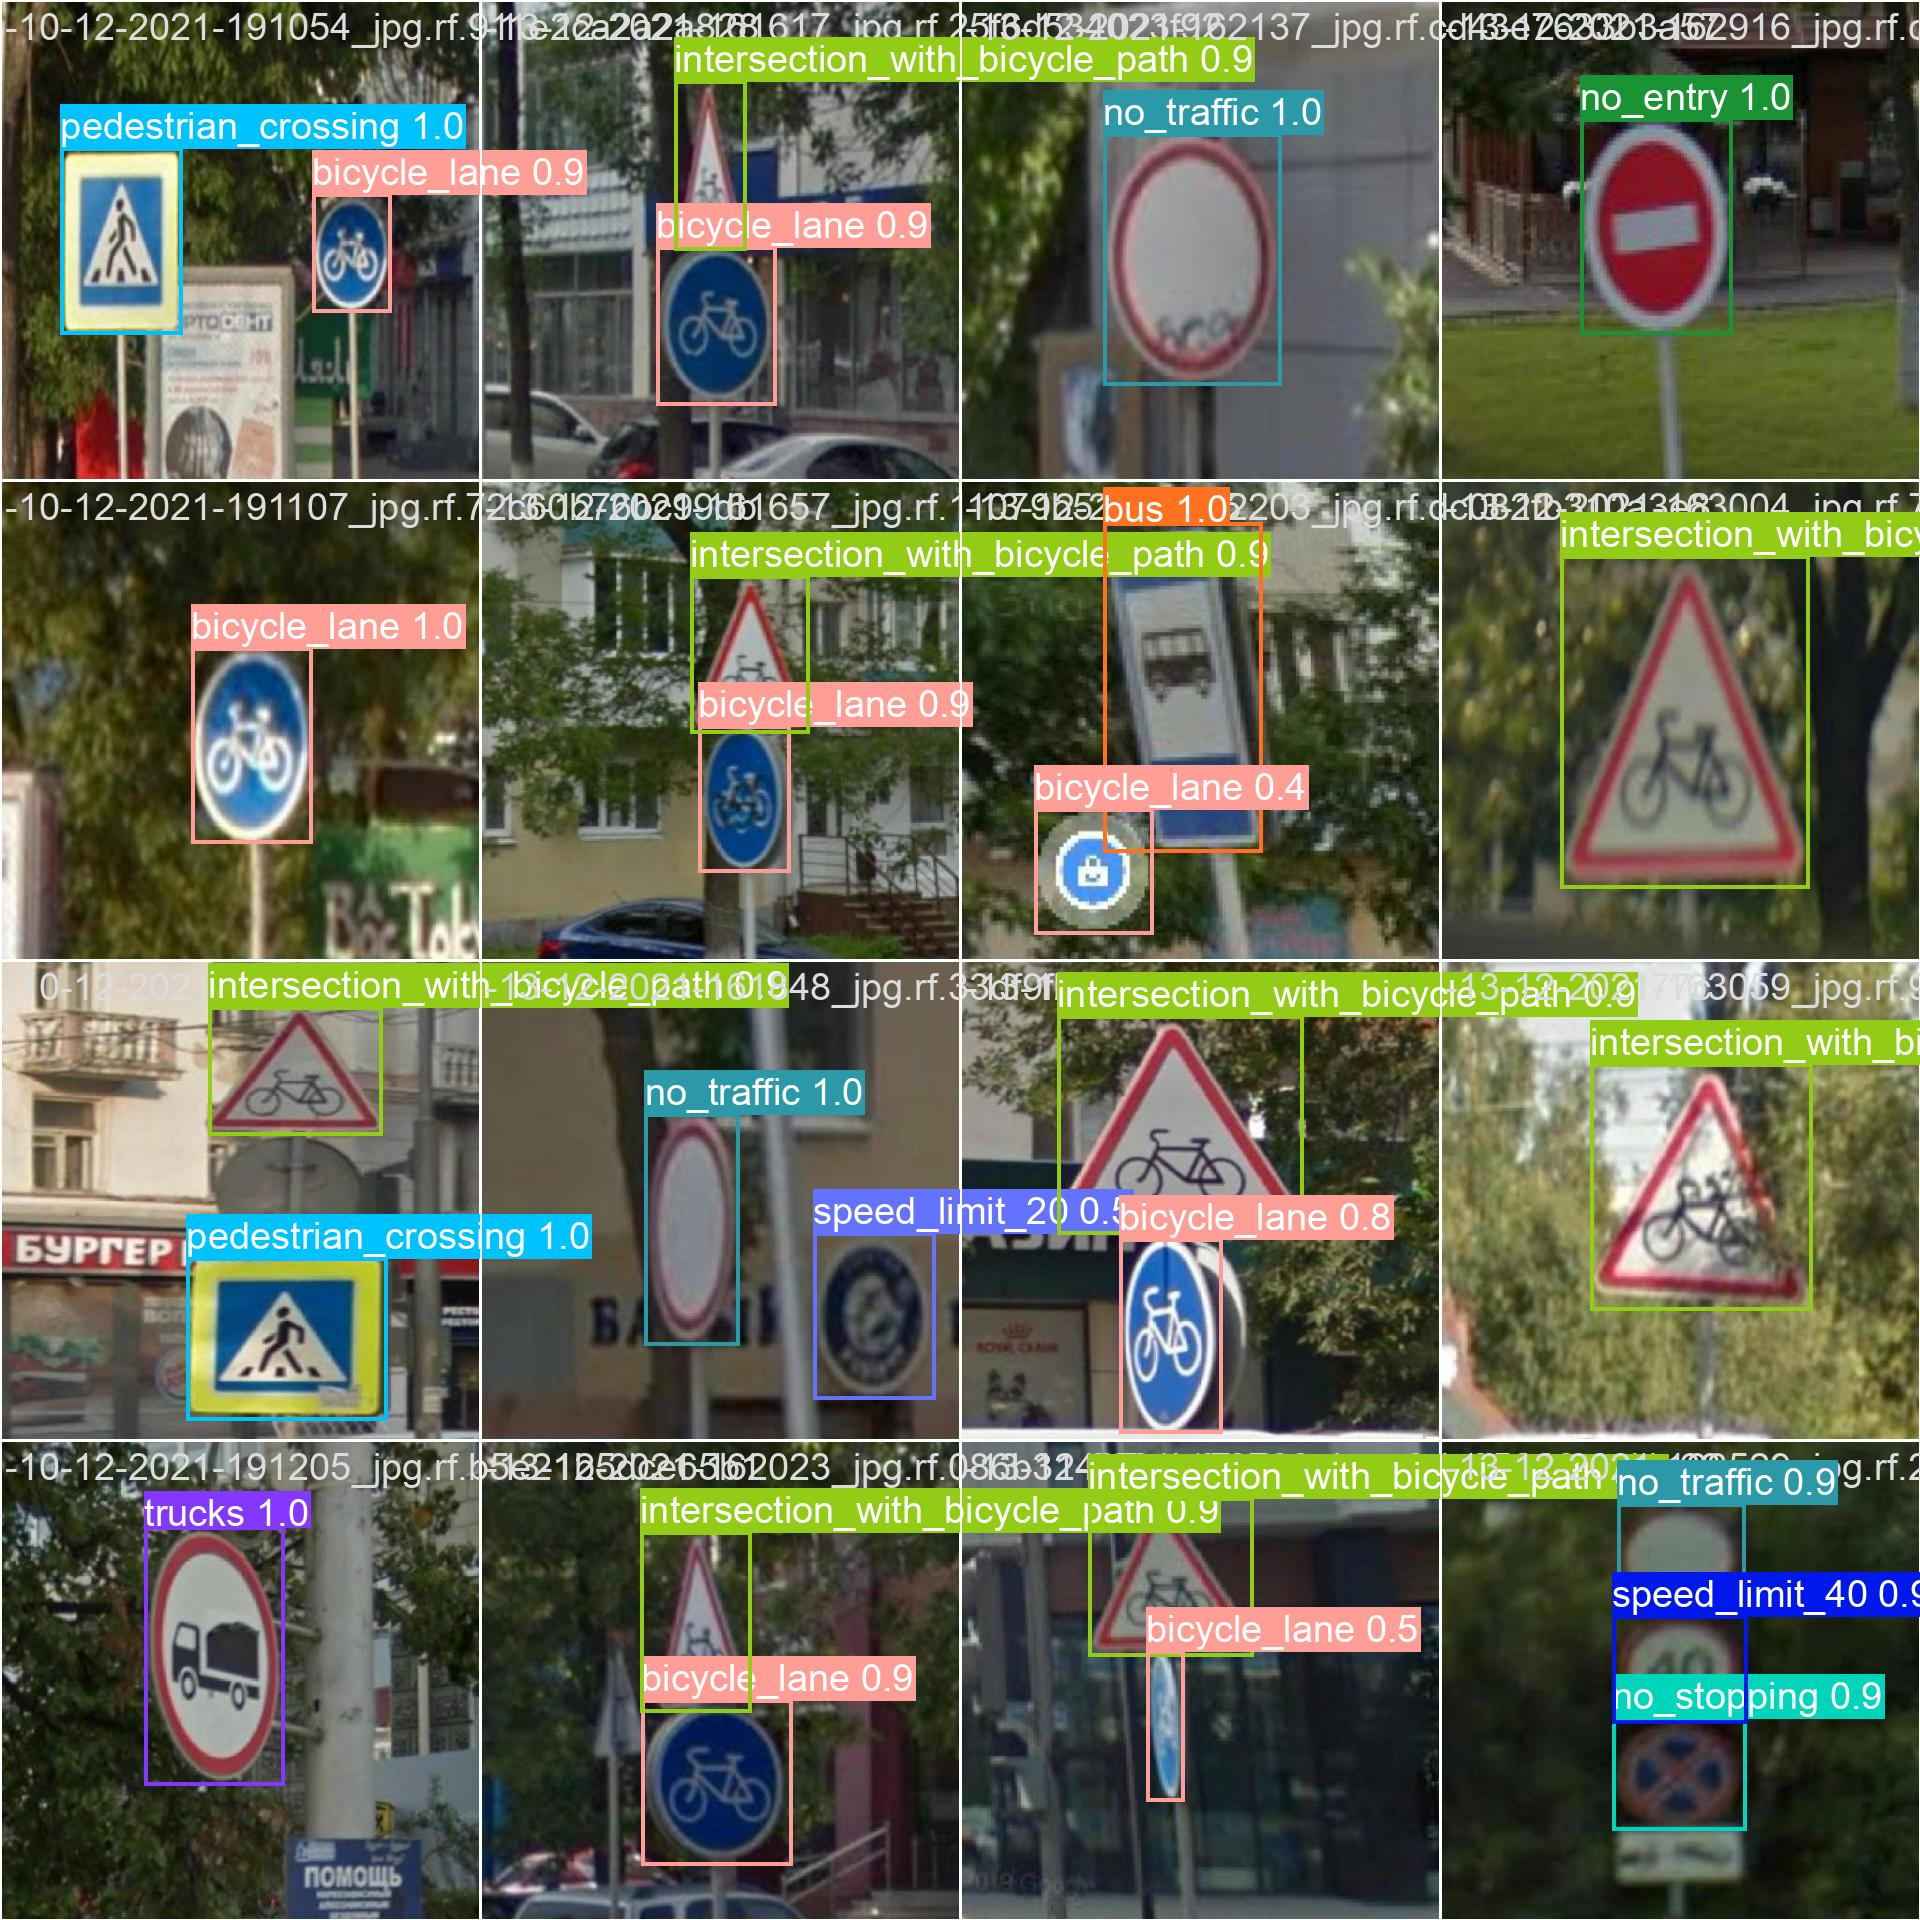

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/val_batch2_pred.jpg', width=600)

In [17]:
task.upload_artifact('rt-detr-sgd-best', artifact_object=f'{HOME}/datasets/runs/detect/train/weights/best.pt')

True

In [ ]:
task.close()

# Local Copy

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!scp -r /content/runs '/content/drive/MyDrive/Road/'